## Detailed EDA: Word Distribution Across Genres

In [1]:
import pandas as pd
import itertools
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt
from yellowbrick.text import FreqDistVisualizer
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import warnings
import seaborn as sns

# from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
warnings.filterwarnings('ignore')
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist
from nltk.stem import WordNetLemmatizer
import spacy
import en_core_web_lg
nlp = en_core_web_lg.load()
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.text import FreqDistVisualizer
import dataframe_image as dfi
from mlxtend.feature_selection import ColumnSelector

In [2]:
# Load the dataset into a DataFrame
new_df = pd.read_csv('cleaned_movie_plots.csv')

In [3]:
# Displays the first 5 rows of the dataset
new_df.head()

Title   Genre  \
0                  The Suburbanite  comedy   
1  How Brown Saw the Baseball Game  comedy   
2                     Laughing Gas  comedy   
3         The Adventures of Dollie   drama   
4                  The Black Viper   drama   

                                                Plot  labels  
0  film family suburb hoping quiet life thing sta...       2  
1  heading baseball game nearby ballpark sport fa...       2  
2  plot black woman going dentist toothache given...       2  
3  beautiful summer day father mother daughter do...       1  
4  thug accosts girl leaf workplace man rescue th...       1

### Visualizing Word Frequency in Drama Genre

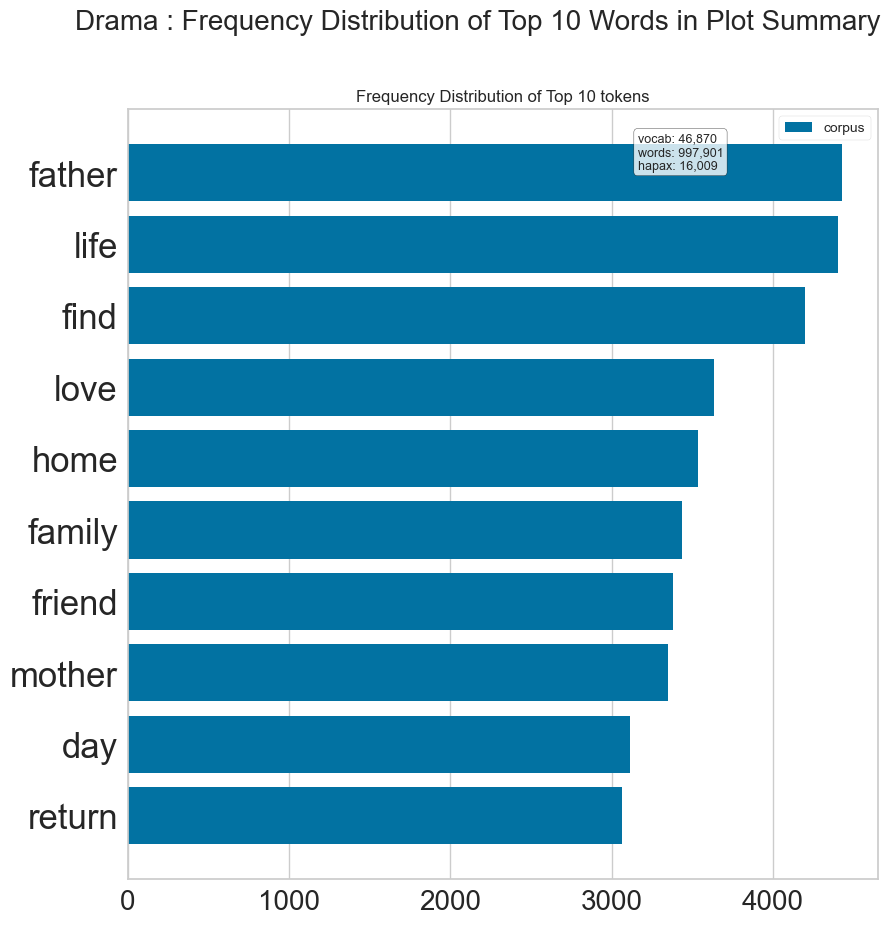

In [4]:
# Filter drama genre plots and titles based where label is 1
drama_plot = new_df.loc[new_df['labels'] == 1, ['Plot', 'Title']]

# Tokenize words from drama plots into a list of lists
drama_plotlist = [x for x in drama_plot['Plot'].str.split()]

# Make the list of lists into a single list of words
drama_plotlist = list(itertools.chain(*drama_plotlist))

# Initialize CountVectorizer for word frequency analysis
count = CountVectorizer()

# Transform the list of words into a document-term matrix (DTM)
docs = count.fit_transform(drama_plotlist)

# Retrieve the list of features (unique words) extracted by the CountVectorizer
features = count.get_feature_names_out()

# Figure for the frequency distribution plot
fig = plt.figure(figsize=(10, 10))
plt.suptitle('Drama : Frequency Distribution of Top 10 Words in Plot Summary', size = 20)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 20)
plt.gcf().subplots_adjust(left=0.15)

# Visualize the top 10 most frequent words in a bar chart
visualizer = FreqDistVisualizer(features = features, n=10, orient='h')
visualizer.fit(docs)
visualizer.show()

# Save the plot as an image
fig.savefig('./Images/freqdistofwordsinplotsummaryfordramagenre.png');

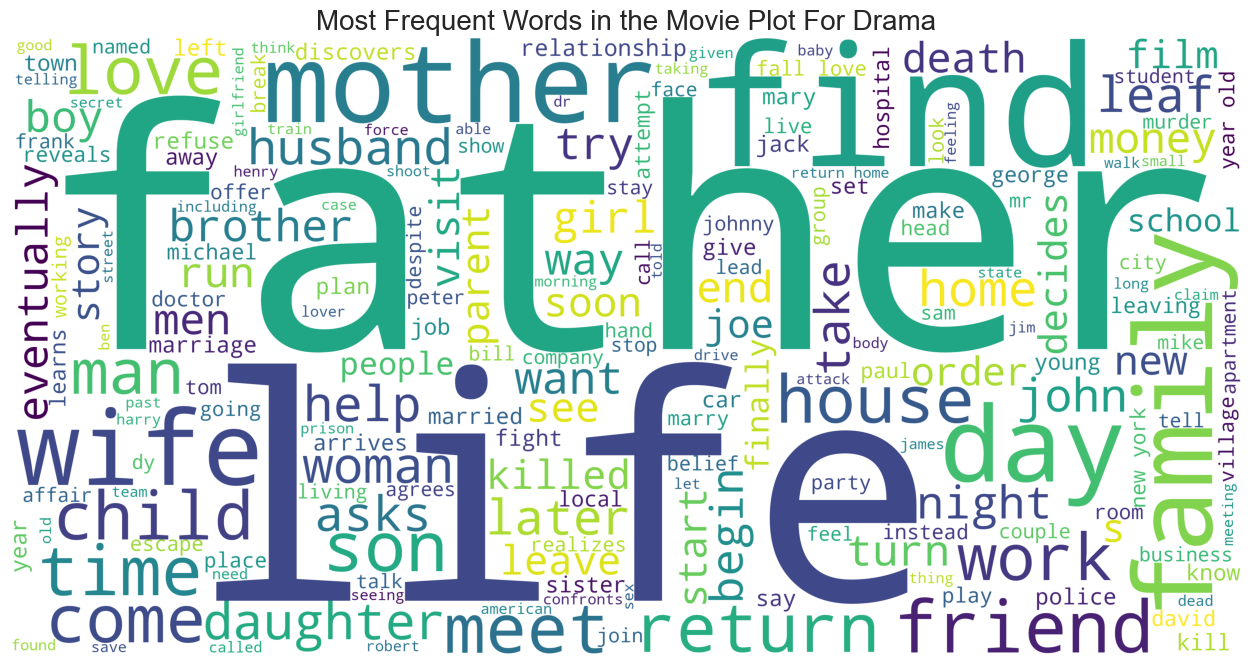

In [5]:
# Join all words from the drama plots into a corpus
plot_corpus = ' '.join(drama_plotlist)
plot_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000, random_state = 42, 
                           normalize_plurals = False).generate(plot_corpus)

# Create a plot for the wordcloud
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(plot_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Plot For Drama', fontsize = 20)
plt.show()

# Save the word cloud
fig.savefig('./Images/MoviePlotCloudDrama.png');

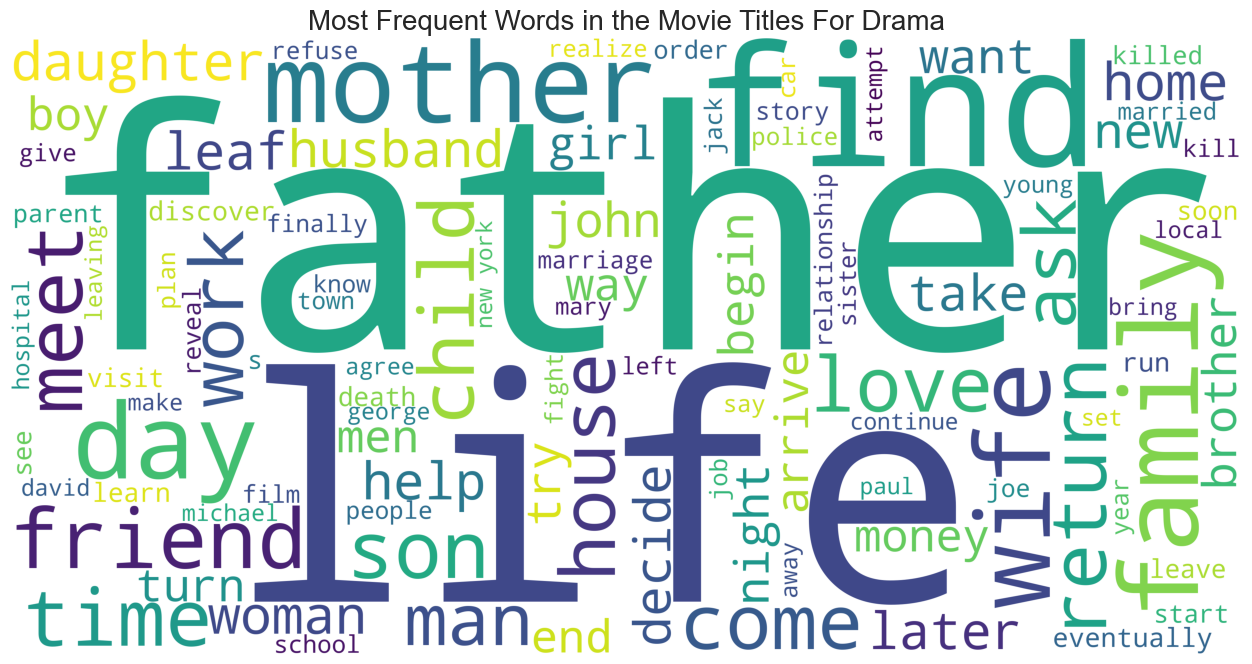

In [6]:
# Join all words from the drama movie titles into a corpus
title_corpus = ' '.join(drama_plotlist)
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000, random_state = 42, max_words = 100).generate(title_corpus)

# Create a plot for the wordcloud
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Titles For Drama', fontsize = 20)
plt.show()

# Save the word cloud as an image
fig.savefig('./images/MovieTitleCloudDrama.png');

### Comedy Movies Decoded: What’s in a Joke?

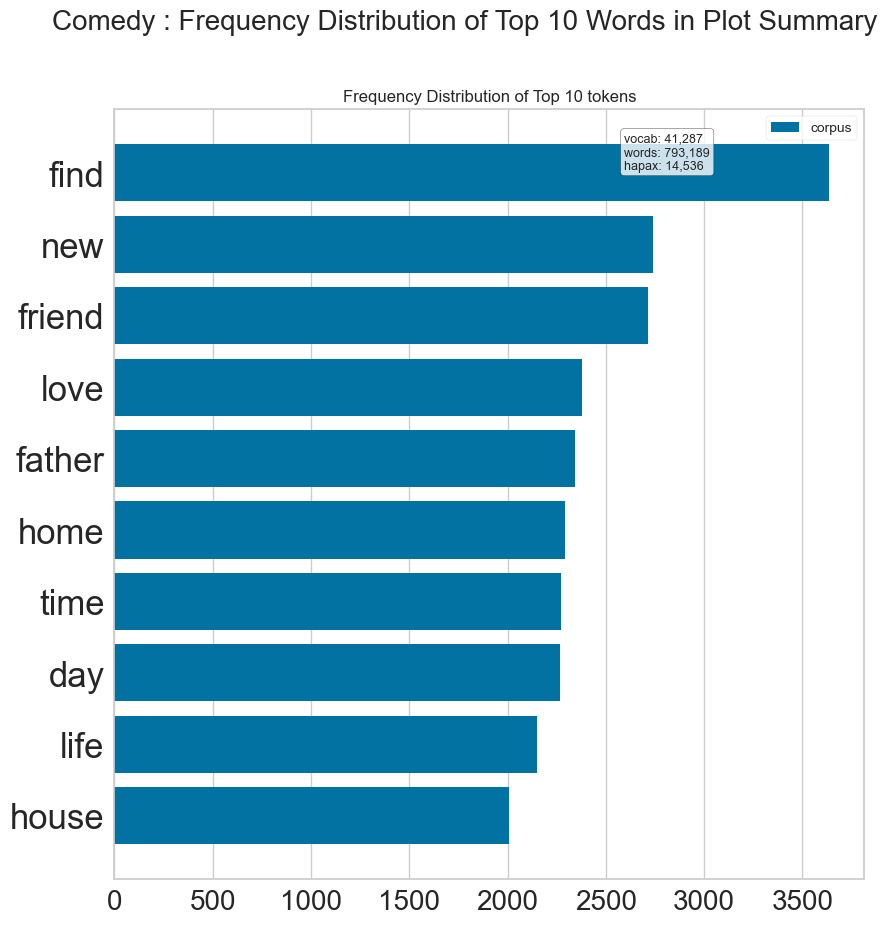

In [7]:
# Filter comedy genre plots and titles based on label 2
comedy_plot = new_df.loc[new_df['labels'] == 2, ['Plot', 'Title']]

# Tokenize words from drama plots into a list of lists
comedy_plotlist = [x for x in comedy_plot['Plot'].str.split()]

# Make the list of lists into a single list of words
comedy_plotlist = list(itertools.chain(*comedy_plotlist))

# Initialize CountVectorizer for word frequency analysis
count = CountVectorizer()

# Transform the list of words into a document-term matrix (DTM)
docs = count.fit_transform(comedy_plotlist)

# Retrieve the list of features (unique words) extracted by the CountVectorizer
features = count.get_feature_names_out()

# Figure for the frequency distribution plot
fig = plt.figure(figsize=(10, 10))
plt.suptitle('Comedy : Frequency Distribution of Top 10 Words in Plot Summary', size = 20)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 20)
plt.gcf().subplots_adjust(left=0.15)

# Visualize the top 10 most frequent words in a bar chart
visualizer = FreqDistVisualizer(features = features, n=10, orient='h')
visualizer.fit(docs)
visualizer.show()

# Save the plot as an image
fig.savefig('./Images/freqdistofwordsinplotsummaryforcomedygenre.png');

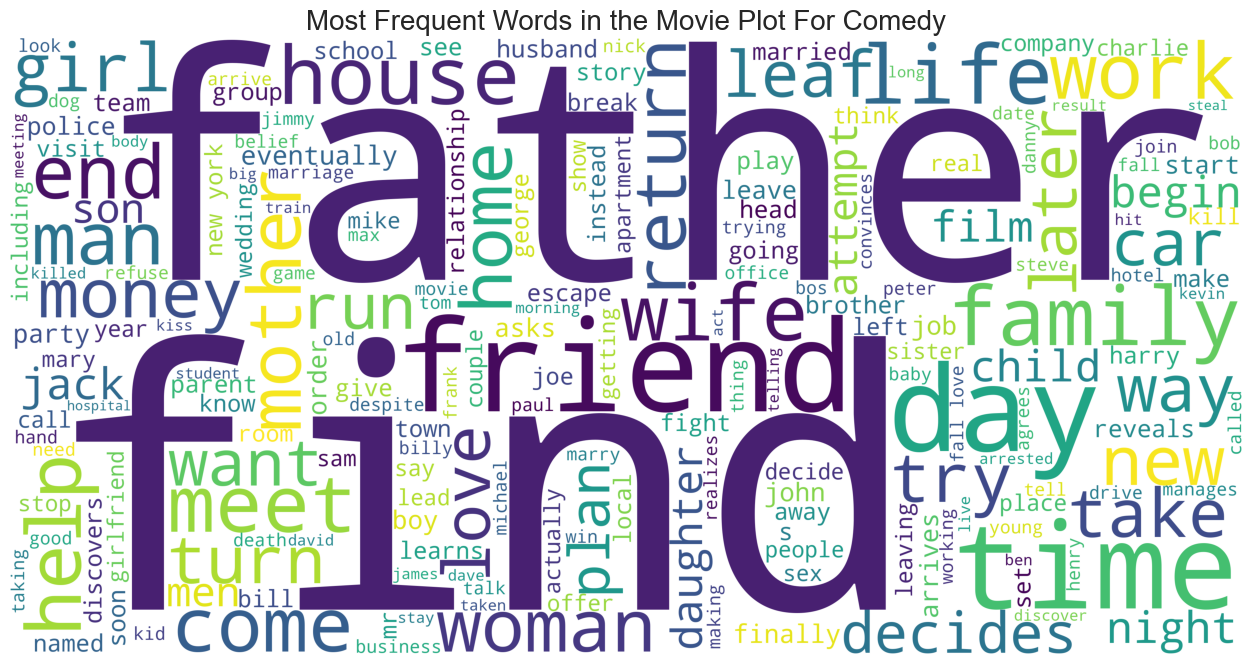

In [8]:
# Join all words from the comedy plots into a corpus
plot_corpus = ' '.join(comedy_plotlist)
plot_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000, random_state = 42, 
                          normalize_plurals = False).generate(plot_corpus)

# Create a plot for the word cloud
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(plot_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Plot For Comedy', fontsize = 20)
plt.show()

# Save the word cloud as an image
fig.savefig('./Images/MoviePlotCloudComedy.png');

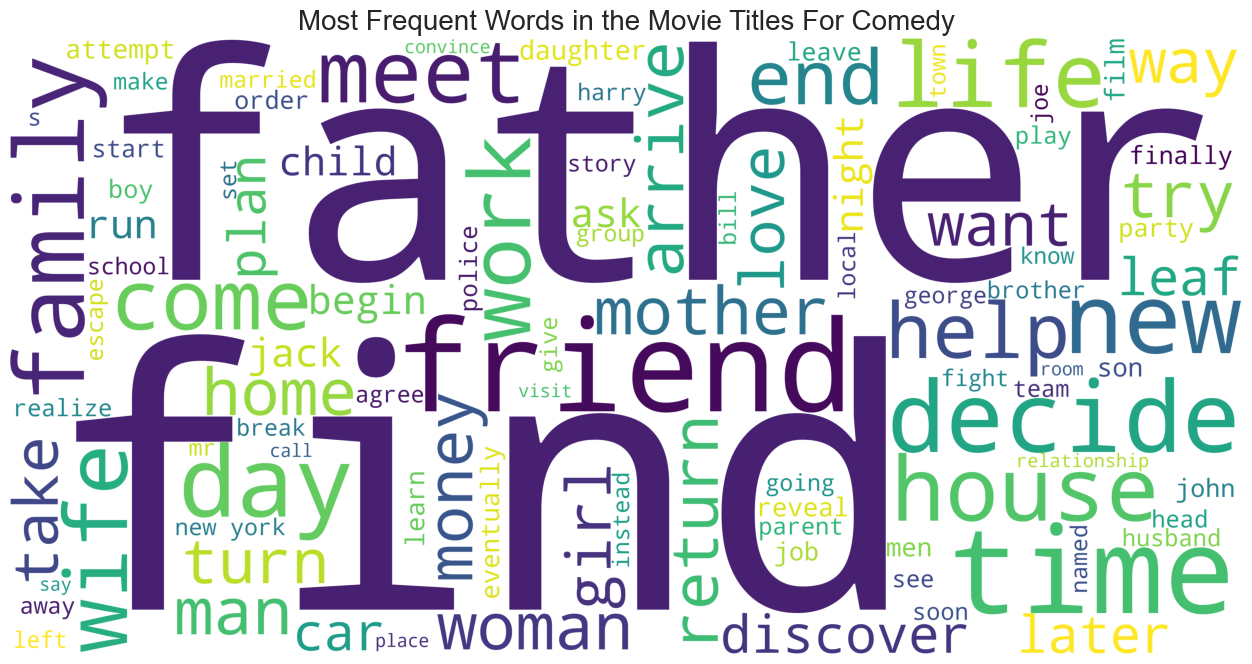

In [9]:
# Join all words from the comedy movie titles into a corpus
title_corpus = ' '.join(comedy_plotlist)
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000, random_state = 42, max_words = 100).generate(title_corpus)

# Create a plot for the word cloud
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Titles For Comedy', fontsize = 20)
plt.show()

# Save the word cloud as an image
fig.savefig('./Images/MovieTitleCloudComedy.png');

### The Language of Fear: Unveiling Horror's Lexicon

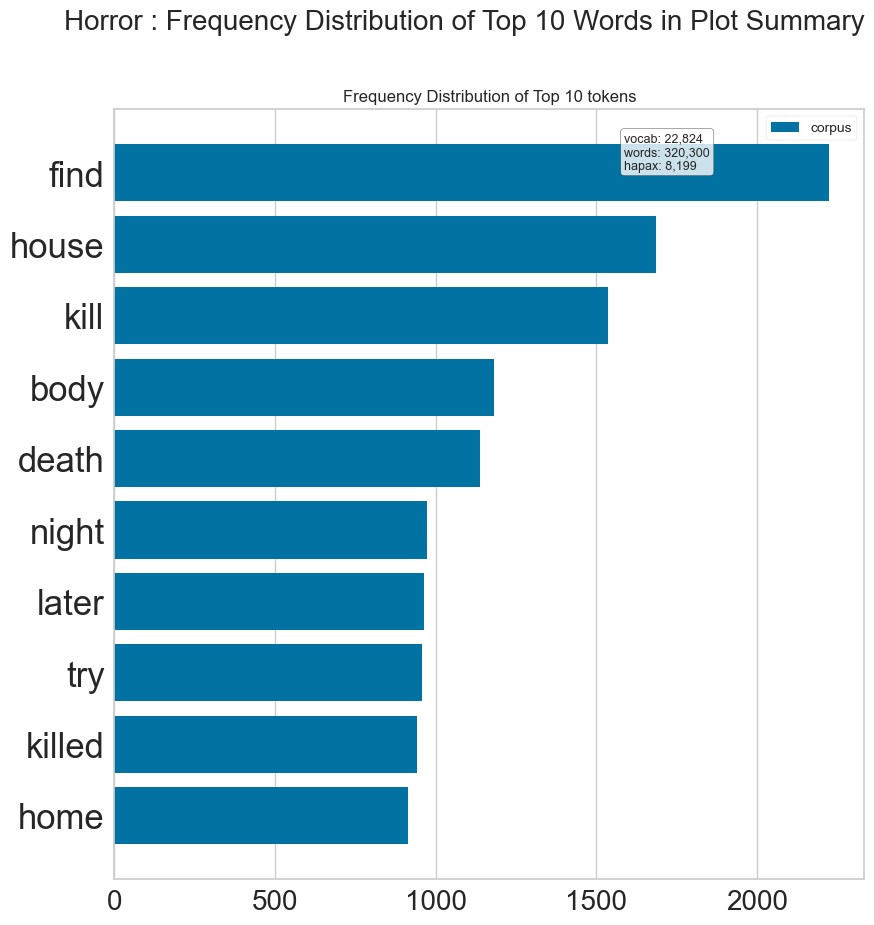

In [10]:
# Filter horror genre plots and titles based on label 3
horror_plot = new_df.loc[new_df['labels'] == 3, ['Plot','Title']]

# Tokenize words from drama plots into a list of lists
horror_plotlist = [x for x in horror_plot['Plot'].str.split()]

# Make the list of lists into a single list of words
horror_plotlist = list(itertools.chain(*horror_plotlist))

# Initialize CountVectorizer for word frequency analysis
count = CountVectorizer()

# Transform the list of words into a document-term matrix (DTM)
docs = count.fit_transform(horror_plotlist)

# Retrieve the list of features (unique words) extracted by the CountVectorizer
features = count.get_feature_names_out()

# Figure for the frequency distribution plot
fig = plt.figure(figsize=(10, 10))
plt.suptitle('Horror : Frequency Distribution of Top 10 Words in Plot Summary', size = 20)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 20)
plt.gcf().subplots_adjust(left=0.15)

# Visualize the top 10 most frequent words in a bar chart
visualizer = FreqDistVisualizer(features = features, n=10, orient='h')
visualizer.fit(docs)
visualizer.show()

# Save the plot as an image
fig.savefig('./Images/freqdistofwordsinplotsummaryforhorrorgenre.png');

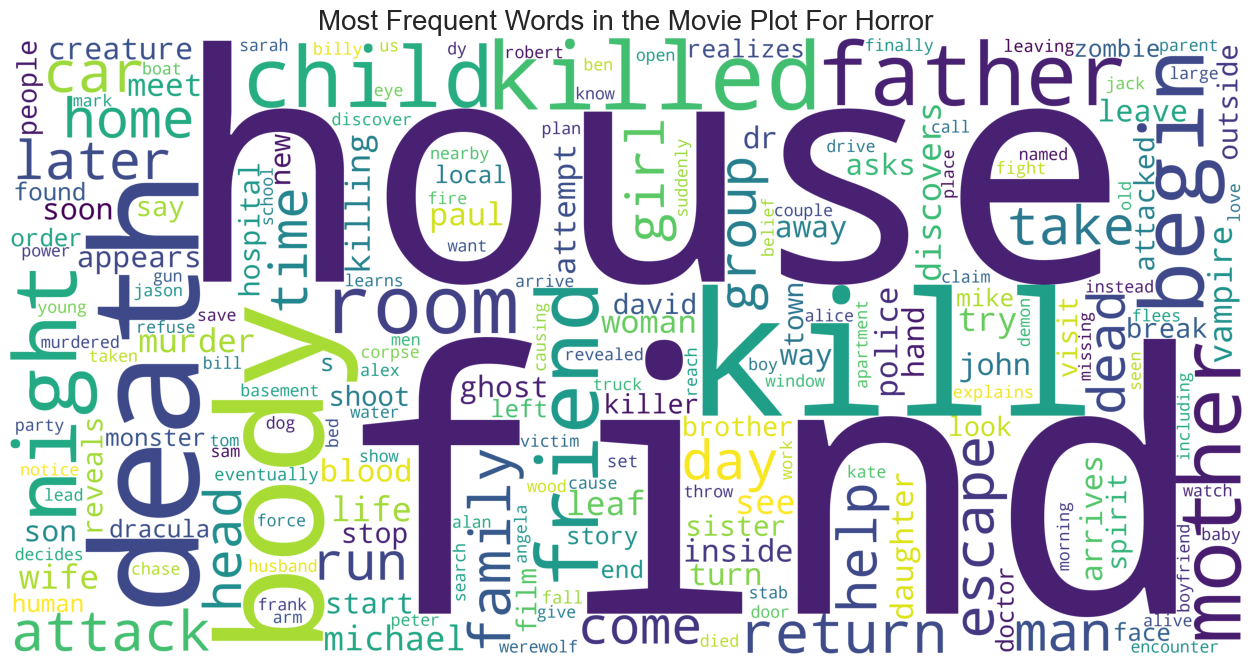

In [11]:
# Join all words from the horror plots into a corpus
plot_corpus = ' '.join(horror_plotlist)
plot_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000, random_state = 42, 
                           normalize_plurals = False).generate(plot_corpus)

# Create a plot for the word cloud
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(plot_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Plot For Horror', fontsize = 20)
plt.show()

# Save the word cloud as an image
fig.savefig('./Images/MoviePlotCloudHorror.png');

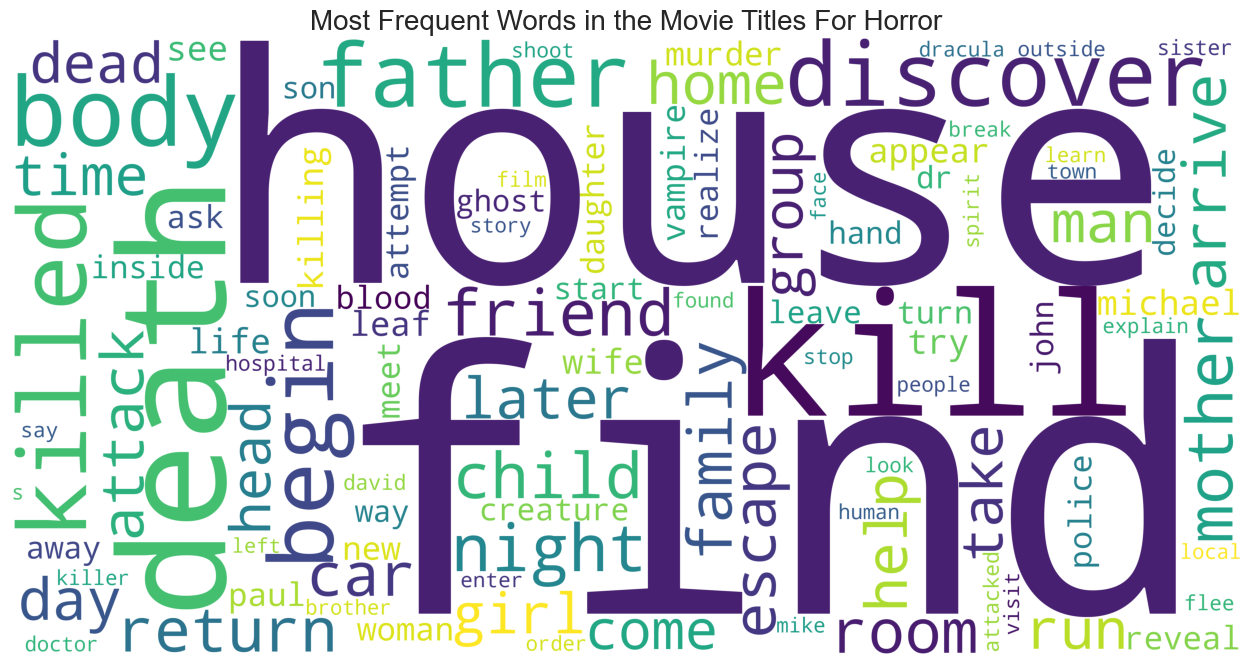

In [12]:
# Join all words from the horror movie titles into a corpus
title_corpus = ' '.join(horror_plotlist)
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000, random_state = 42, max_words = 100).generate(title_corpus)

# Create a plot for the word cloud
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Titles For Horror', fontsize = 20)
plt.show()

# Save the word cloud as an image
fig.savefig('./Images/MovieTitleCloudHorror.png');

### The Art of Impact: Decoding Action Narratives

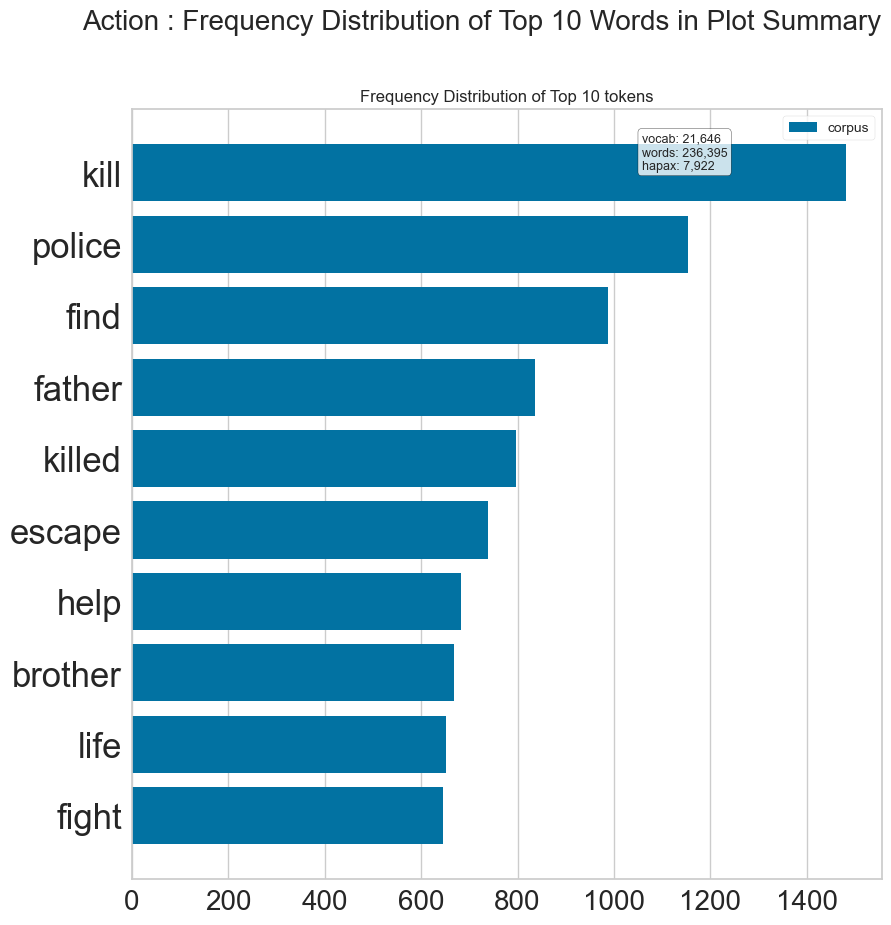

In [13]:
# Filter action genre plots and titles based on label 4
action_plot = new_df.loc[new_df['labels'] == 4, ['Plot', 'Title']]

# Tokenize words from drama plots into a list of lists
action_plotlist = [x for x in action_plot['Plot'].str.split()]

# Make the list of lists into a single list of words
action_plotlist = list(itertools.chain(*action_plotlist))

# Initialize CountVectorizer for word frequency analysis
count = CountVectorizer()

# Transform the list of words into a document-term matrix (DTM)
docs = count.fit_transform(action_plotlist)

# Retrieve the list of features (unique words) extracted by the CountVectorizer
features = count.get_feature_names_out()

# Figure for the frequency distribution plot
fig = plt.figure(figsize=(10, 10))
plt.suptitle('Action : Frequency Distribution of Top 10 Words in Plot Summary', size = 20)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 20)
plt.gcf().subplots_adjust(left=0.15)

# Visualize the top 10 most frequent words in a bar chart
visualizer = FreqDistVisualizer(features = features, n=10, orient='h')
visualizer.fit(docs)
visualizer.show()

# Save the plot as an image
fig.savefig('./Images/freqdistofwordsinplotsummaryforactiongenre.png');

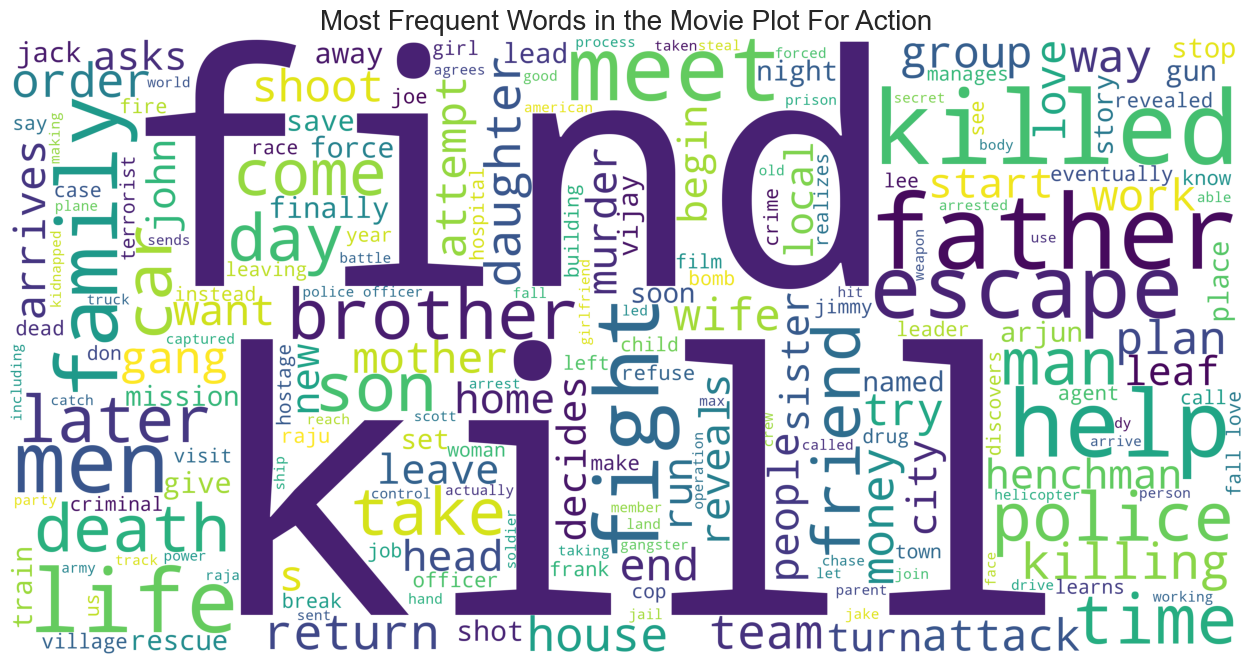

In [14]:
# Join all words from the action plots into a corpus
plot_corpus = ' '.join(action_plotlist)
plot_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000, random_state = 42, 
                           normalize_plurals = False).generate(plot_corpus)

# Create a plot for the word cloud
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(plot_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Plot For Action', fontsize = 20)
plt.show()

# Save the word cloud as an image
fig.savefig('./Images/MoviePlotCloudAction.png');

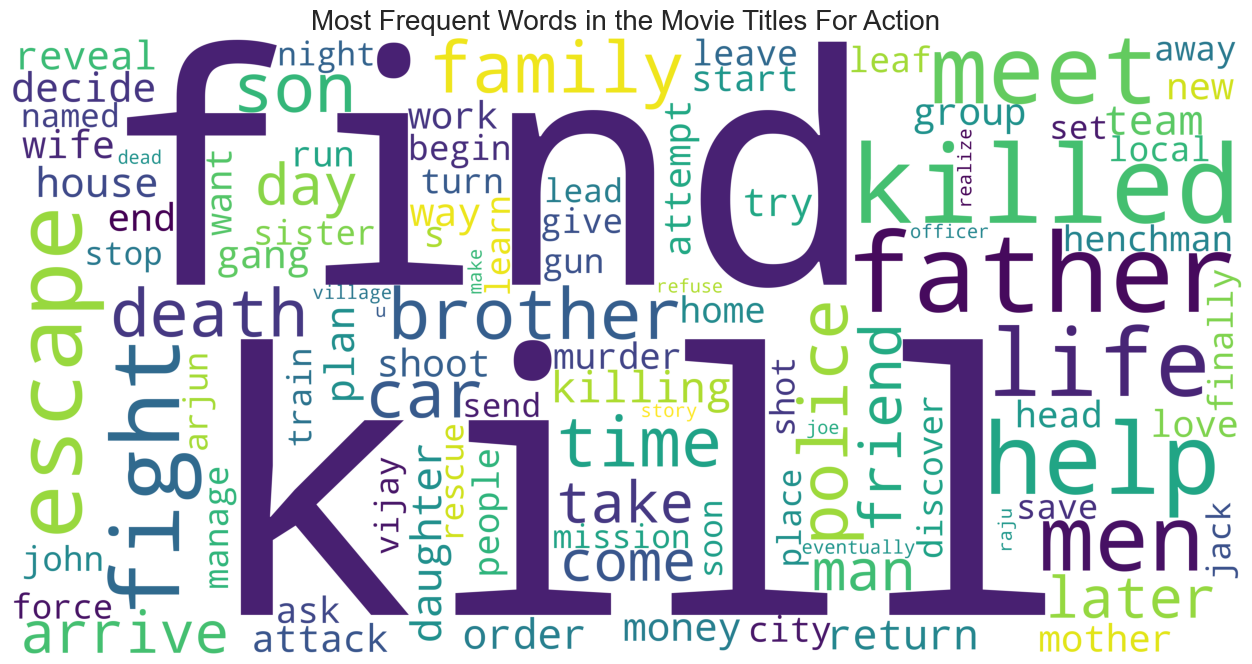

In [15]:
# Join all words from the action movie titles into a corpus
title_corpus = ' '.join(action_plotlist)
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000, random_state = 42, max_words = 100).generate(title_corpus)

# Create a plot for the word cloud
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Titles For Action', fontsize = 20)
plt.show()

# Save the word cloud as an image
fig.savefig('./Images/MovieTitleCloudAction.png');

### Secrets and Shadows: Keywords in Thriller Narratives

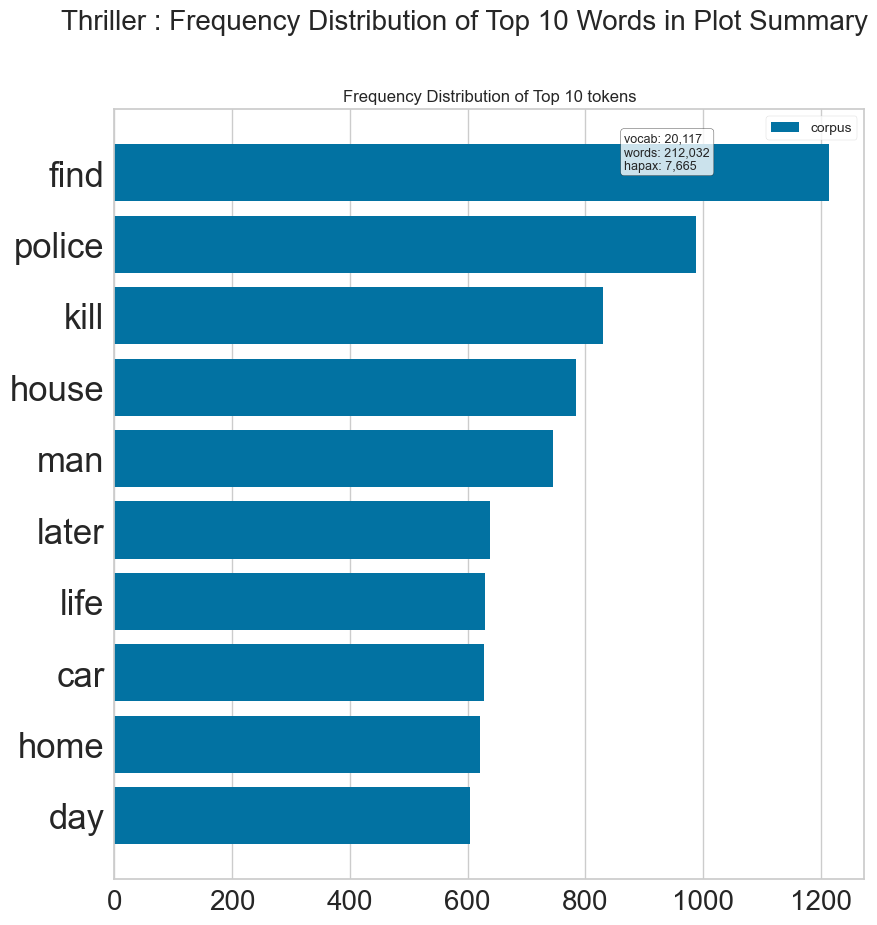

In [16]:
# Filter action genre plots and titles based on label 5
thriller_plot = new_df.loc[new_df['labels'] == 5, ['Plot', 'Title']]

# Tokenize words from drama plots into a list of lists
thriller_plotlist = [x for x in thriller_plot['Plot'].str.split()]

# Make the list of lists into a single list of words
thriller_plotlist = list(itertools.chain(*thriller_plotlist))

# Initialize CountVectorizer for word frequency analysis
count = CountVectorizer()

# Transform the list of words into a document-term matrix (DTM)
docs = count.fit_transform(thriller_plotlist)

# Retrieve the list of features (unique words) extracted by the CountVectorizer
features = count.get_feature_names_out()

# Figure for the frequency distribution plot
fig = plt.figure(figsize=(10, 10))
plt.suptitle('Thriller : Frequency Distribution of Top 10 Words in Plot Summary', size = 20)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 20)
plt.gcf().subplots_adjust(left=0.15)

# Visualize the top 10 most frequent words in a bar chart
visualizer = FreqDistVisualizer(features = features, n=10, orient='h')
visualizer.fit(docs)
visualizer.show()

# Save the plot as an image
fig.savefig('./Images/freqdistofwordsinplotsummaryforthrillergenre.png');

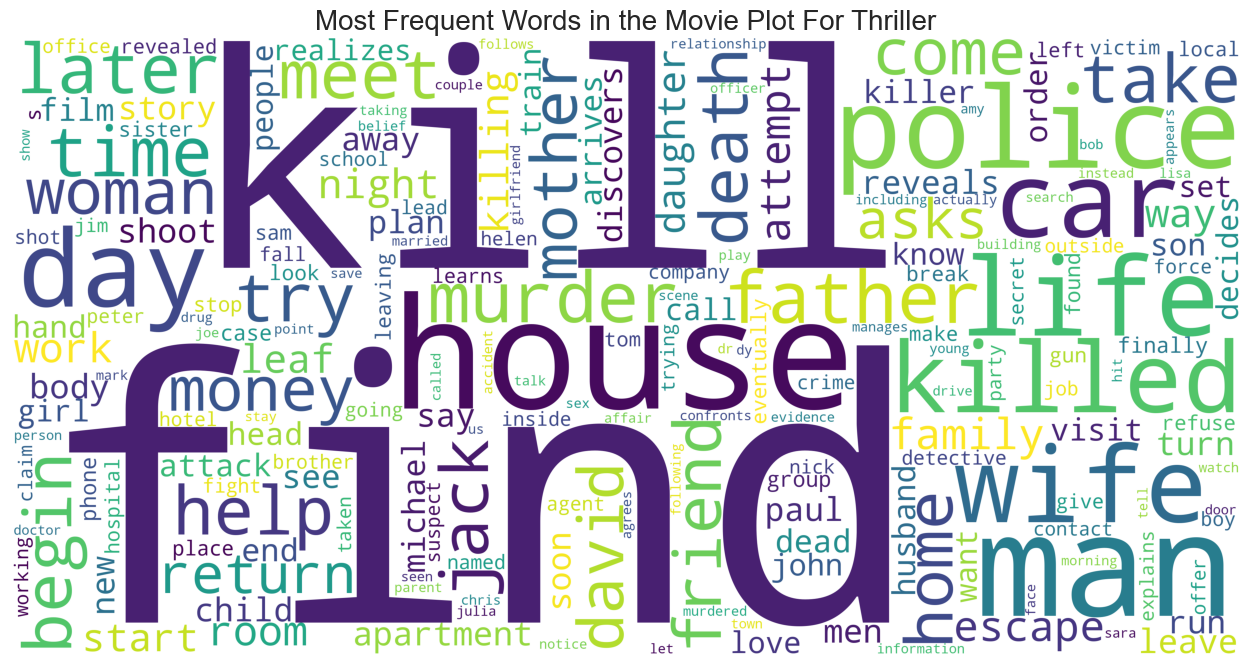

In [17]:
# Join all words from the thriller plots into a corpus
plot_corpus = ' '.join(thriller_plotlist)
plot_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000, random_state = 42, 
                           normalize_plurals = False).generate(plot_corpus)

# Create a plot for the word cloud
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(plot_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Plot For Thriller', fontsize = 20)
plt.show()

# Save the word cloud as an image
fig.savefig('./Images/MoviePlotCloudThriller.png');

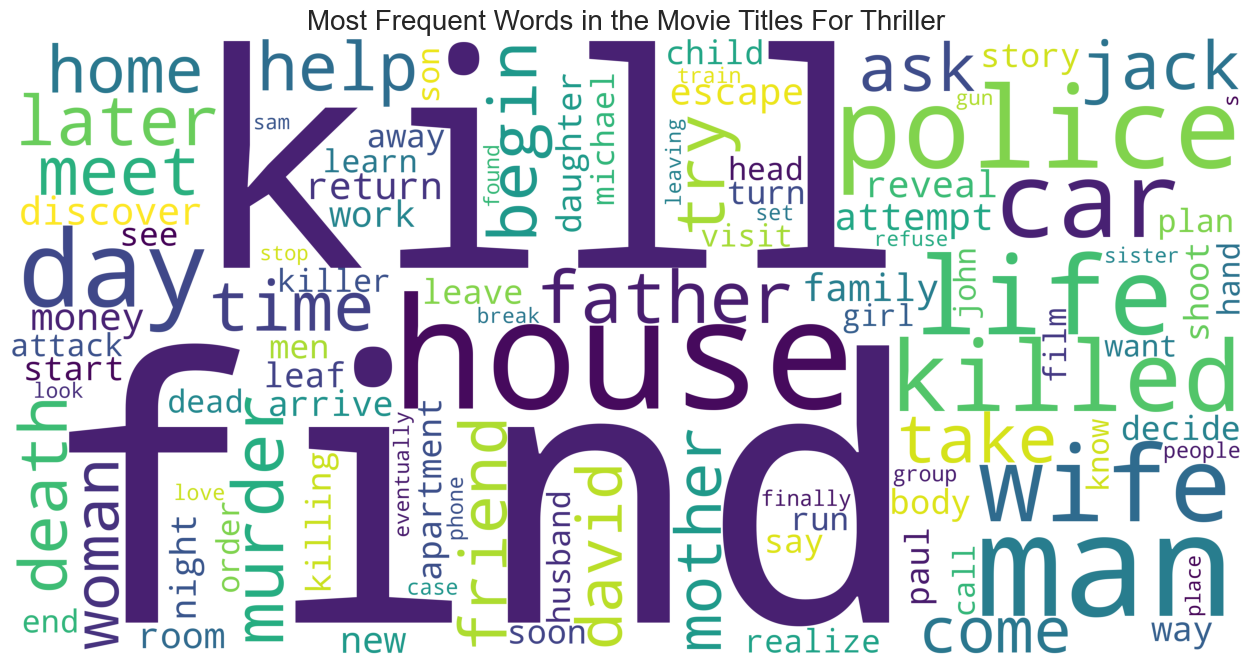

In [18]:
# Join all words from the thriller movie titles into a corpus
title_corpus = ' '.join(thriller_plotlist)
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000, random_state = 42, max_words = 100).generate(title_corpus)

# Create a plot for the word cloud
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Titles For Thriller', fontsize = 20)
plt.show()

# Save the word cloud as an image
fig.savefig('./Images/MovieTitleCloudThriller.png');

### Love in Full Color: Visualizing Romance Keywords

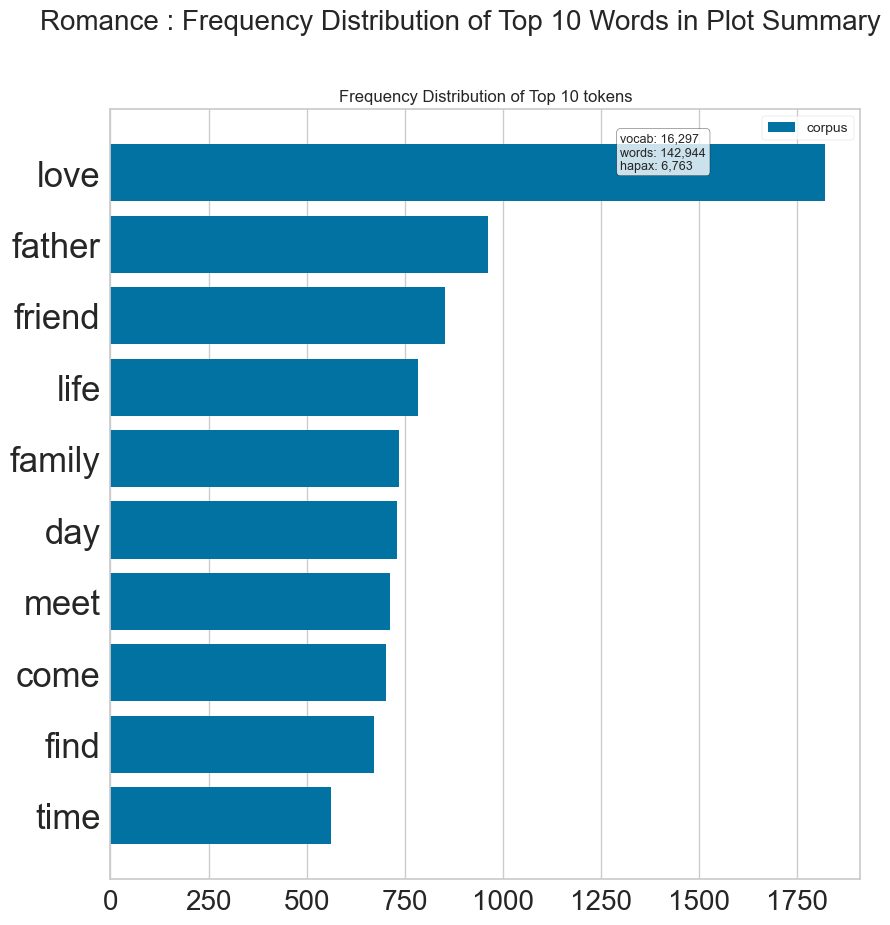

In [19]:
# Filter action genre plots and titles based on label 6
romance_plot = new_df.loc[new_df['labels'] == 6, ['Plot', 'Title']]

# Tokenize words from drama plots into a list of lists
romance_plotlist = [x for x in romance_plot['Plot'].str.split()]

# Make the list of lists into a single list of words
romance_plotlist = list(itertools.chain(*romance_plotlist))

# Initialize CountVectorizer for word frequency analysis
count = CountVectorizer()

# Transform the list of words into a document-term matrix (DTM)
docs = count.fit_transform(romance_plotlist)

# Retrieve the list of features (unique words) extracted by the CountVectorizer
features = count.get_feature_names_out()

# Figure for the frequency distribution plot
fig = plt.figure(figsize=(10, 10))
plt.suptitle('Romance : Frequency Distribution of Top 10 Words in Plot Summary', size = 20)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 20)
plt.gcf().subplots_adjust(left=0.15)

# Visualize the top 10 most frequent words in a bar chart
visualizer = FreqDistVisualizer(features = features, n=10, orient='h')
visualizer.fit(docs)
visualizer.show()

# Save the plot as an image
fig.savefig('./Images/freqdistofwordsinplotsummaryforromancegenre.png');

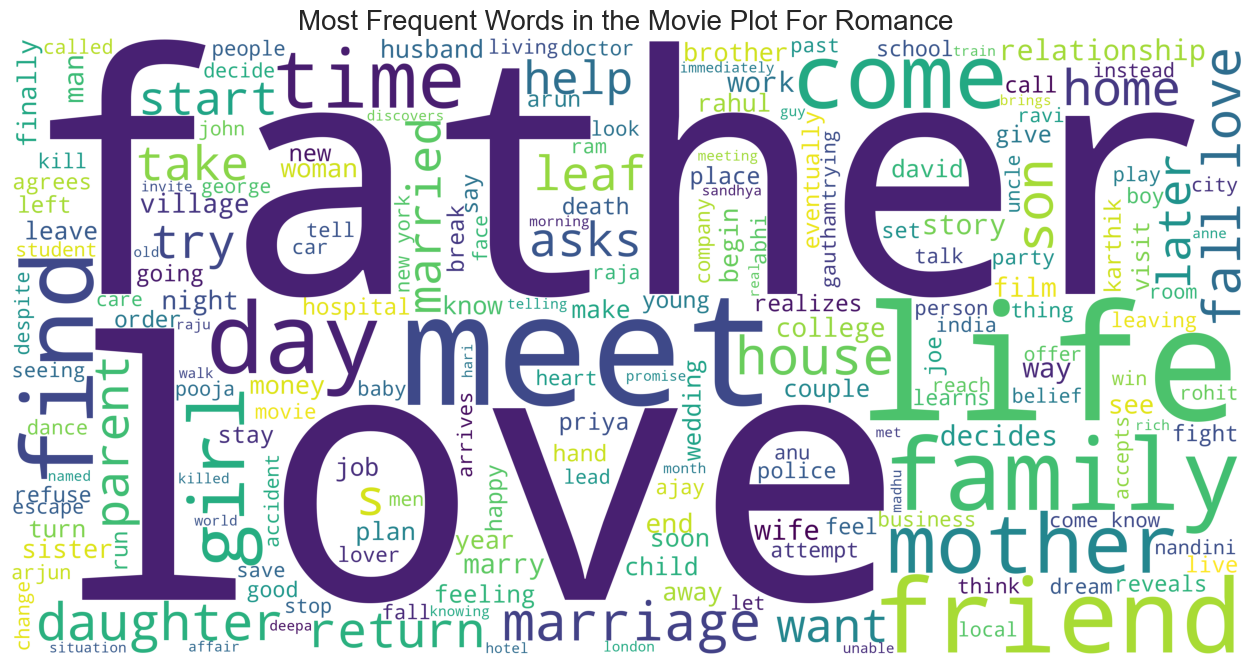

In [20]:
# Join all words from the romance plots into a corpus
plot_corpus = ' '.join(romance_plotlist)
plot_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000, random_state = 42, 
                           normalize_plurals = False).generate(plot_corpus)

# Create a plot for the word cloud
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(plot_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Plot For Romance', fontsize = 20)
plt.show()

# Save the word cloud as an image
fig.savefig('./Images/MoviePlotCloudRomance.png');

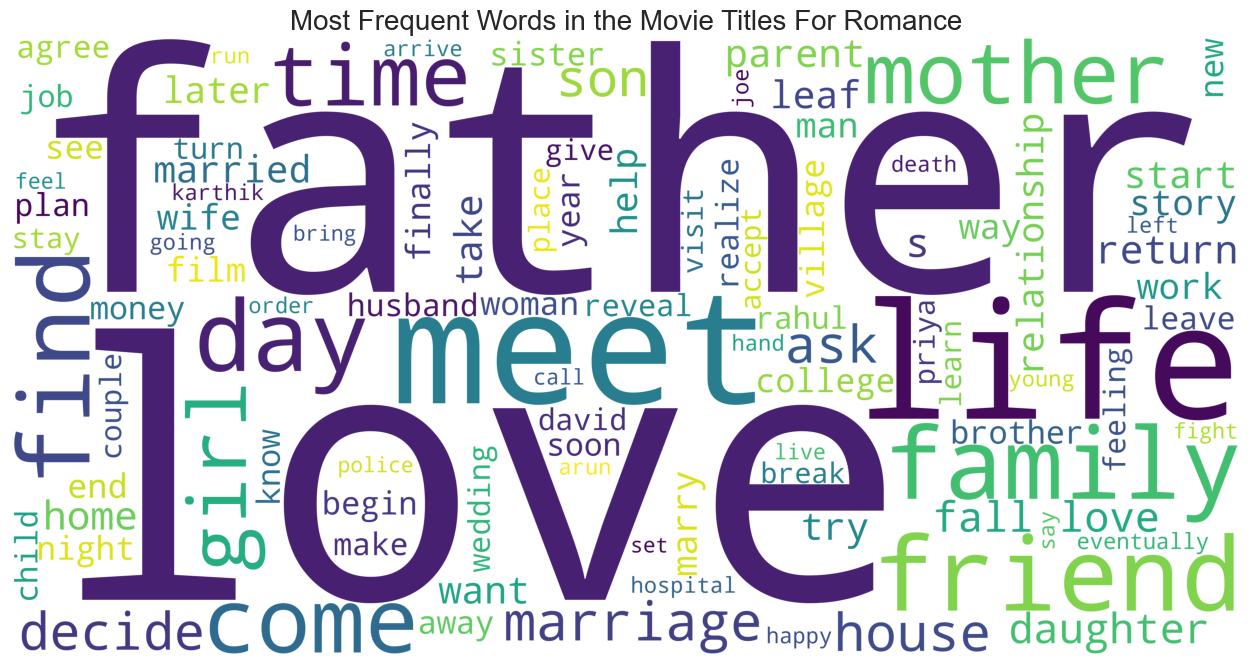

In [21]:
# Join all words from the romance movie titles into a corpus
title_corpus = ' '.join(romance_plotlist)
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000, random_state = 42, max_words = 100).generate(title_corpus)

# Create a plot for the word cloud
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Titles For Romance', fontsize = 20)
plt.show()

# Save the word cloud as an image
fig.savefig('./Images/MovieTitleCloudRomance.png');

## Modelling

In [22]:
# Define the feature (X) and target (y) variables
X = new_df['Plot']
y = new_df['labels']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state = 42, stratify = y)

# Print the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10872,) (3625,) (10872,) (3625,)


### Dummy Classifier Model

In [23]:
# Define the hyperparameter grid for the dummy classifier
dummy_grid = {
    'strategy': ['most_frequent', 'stratified', 'prior', 'uniform', 'constant']
}

# Initialize a DummyClassifier with a fixed random state
dummy = DummyClassifier(random_state = 42)

# Perform grid search to find the best strategy using 5-fold cross-validation
dummy_gs = GridSearchCV(dummy, param_grid = dummy_grid, cv = 5)

# Fit the grid search to the training data
dummy_gs.fit(X_train, y_train)

# Print the best score from the grid search
print(dummy_gs.best_score_)

0.4114238704015058


### TF-IDF Vectorizer

In [24]:
# Initialize a TF-IDF vectorizer
vectorizer = TfidfVectorizer(ngram_range = (1,1), max_df=.85, min_df=15, lowercase=False)

# Fit the vectorizer to the training data and transform the text data into TF-IDF features
tfidf_Xtr = vectorizer.fit_transform(X_train)

### Multinomial Naive Bayes Model

In [25]:
# Initialize an empty dictionary to store model results
model_resultstfidf = {}

# Define the hyperparameter grid for the Multinomial Naive Bayes model
mnb_grid = {
    'alpha': [0, 0.2, 0.5, 0.8, 1.0],
    'fit_prior' : [True, False],
    'class_prior' : [None, [.4, .3, 0.08, .07, .06, .06], [.167, .167, .167, .167, .167, .167]]
}

# Initialize a Multinomial Naive Bayes model
mnb = MultinomialNB()

# Perform grid search with 5-fold cross-validation
mnb_tfidf_gs = GridSearchCV(mnb, param_grid = mnb_grid, cv = 5)
mnb_tfidf_gs.fit(tfidf_Xtr, y_train)

# Print the best score obtained from the grid search
print(mnb_tfidf_gs.best_score_)

# Store the best score of the Multinomial Naive Bayes model in the result dictionary
model_resultstfidf['Multinomial Bayes'] = mnb_tfidf_gs.best_score_

0.6202179995558799


### Logistic Regression Model

In [26]:
# Define the hyperparameter grid for the Logistic Regression model
lr_grid = {
    'penalty' : ['l1', 'l2', 'none'],
    'C' : [1.0, 1e2, 1e4, 1e10],
    'class_weight' : ['balanced', None],
    'solver' : ['lbfgs', 'liblinear'],
    'multi_class' : ['ovr', 'multinomial']
}

# Initialize a Logistic Regression model with a fixed random state
logreg = LogisticRegression(random_state = 42)

# Perform grid search with 5-fold cross-validation 
logreg_tfidf_gs = GridSearchCV(logreg, param_grid = lr_grid, cv = 5)
logreg_tfidf_gs.fit(tfidf_Xtr, y_train)

# Print the best score obtained from the grid search
print(logreg_tfidf_gs.best_score_)

# Store the best score of the Logistic Regression model in the result dictionary
model_resultstfidf['Logistic Regression'] = logreg_tfidf_gs.best_score_

0.634289968171388


### Decision Tree Classifier

In [27]:
# Define the hyperparameter grid for the Decision Tree model
grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 5, 10],
    'min_samples_split': [1, 5, 10, 20]
}

# Initialize a Decision Tree classifier with a fixed random state
dt_clf = DecisionTreeClassifier (random_state = 42)

# Perform grid search with 5-fold cross-validation
gs_tfidf_tree = GridSearchCV(dt_clf, param_grid = grid, cv = 5)
gs_tfidf_tree.fit(tfidf_Xtr, y_train)

# Print the best score obtained from the grid search
print(gs_tfidf_tree.best_score_)

# Store the best score of the Decision Tree model in the result dictionary
model_resultstfidf['Decision Tree'] = gs_tfidf_tree.best_score_

0.46394497139654645


### Count Vectorizer

In [28]:
# Initialize the CountVectorizer to extract n-grams (1 to 3) and limit the number of features to 30,000
countvec = CountVectorizer(ngram_range = (1,3), max_features = 30000)

# Transform the training data into a sparse matrix of token counts using the vectorizer
vec_Xtr = countvec.fit_transform(X_train)

### Multinomial Naive Bayes Model

In [29]:
# Initialize a dictionary to store model results for CountVectorizer-based models
model_results_cvec = {}

# Define the hyperparameter grid for Multinomial Naive Bayes model
mnb_grid = {
    'alpha': [0, 0.2, 0.5, 0.8, 1.0],
    'fit_prior' : [True, False],
    'class_prior' : [None, [.4, .3, 0.08, .07, .06, .06], [.167, .167, .167, .167, .167, .167]]
}

# Instantiate the Multinomial Naive Bayes model 
mnb = MultinomialNB()

# Perform GridSearchCV to find the best hyperparameters
mnb_cvec_gs = GridSearchCV(mnb, param_grid = mnb_grid, cv = 5)

# Fit the model using CountVectorizer-based features
mnb_cvec_gs.fit(vec_Xtr, y_train)

# Print the best score obtained from the grid search
print(mnb_cvec_gs.best_score_)

# Store the best score in the result dictionary 
model_results_cvec['Multinomial Bayes'] = mnb_cvec_gs.best_score_

0.6025561864881727


### Logistic Regression Model

In [30]:
# Define hyperparameter grid for Logistic Regression model
lr_grid = {
    'penalty' : ['l1', 'l2', 'none'],
    'C' : [1.0, 1e2, 1e4, 1e10],
    'class_weight' : ['balanced', None],
    'solver' : ['lbfgs', 'liblinear'],
    'multi_class' : ['ovr', 'multinomial']
}

# Initialize Logistic Regression model
logreg = LogisticRegression(random_state = 42)

# Perform GridSearchCV to find the best hyperparameters
logreg_cvec_gs = GridSearchCV(logreg, param_grid = lr_grid, cv = 5)

# Fit the model using CountVectorizer-based features
logreg_cvec_gs.fit(vec_Xtr, y_train)

# Print the best score obtained from the grid search
print(logreg_cvec_gs.best_score_)

# Store the best score in the result dictionary
model_results_cvec['Logistic Regression'] = logreg_cvec_gs.best_score_

0.6132259408474237


### Decision Tree Classifier

In [31]:
# Define hyperparameter grid for Decision Tree model
grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 5, 10],
    'min_samples_split': [1, 5, 10, 20]
}

# Initialize Decision Tree model
dt_clf = DecisionTreeClassifier (random_state = 42)

# Perform GridSearchCV to find the best hyperparameters
gs_cvec_tree = GridSearchCV(dt_clf, param_grid = grid, cv = 5)

# Fit the model using CountVectorizer-based features 
gs_cvec_tree.fit(vec_Xtr, y_train)

# Print the best score obtained from the grid search
print(gs_cvec_tree.best_score_)

# Store the best score in the result dictionary
model_results_cvec['Decision Tree'] = gs_cvec_tree.best_score_

0.47553388531125423


### SGD Classifier on Count Vectorizer

In [32]:
from sklearn.linear_model import SGDClassifier

# Define hyperparameter grid for SGD Classifier
grid = {
    'loss' : ['hinge', 'log'],
    'penalty' : ['l2', 'l1'],
    'alpha' : [1e-3, 1e-4, 1e-5],
    'max_iter' : [10, 15, 20],
    'class_weight' : ['balanced', None]
}

# Initialize SGD Classifier with a fixed random state
sgd = SGDClassifier(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
sgd_cvec_gs = GridSearchCV(sgd, param_grid = grid, cv=5)

# Fit the model using CountVectorizer-based features
sgd_cvec_gs.fit(vec_Xtr, y_train)

# Print the best score obtained from the grid search
print(sgd_cvec_gs.best_score_)

# Store the best score in the result dictionary
model_results_cvec['SGD'] = sgd_cvec_gs.best_score_

0.604027154775878


In [33]:
# Retrieve the best hyperparameters for the SGD classifier
sgd_cvec_gs.best_params_

{'alpha': 0.001,
 'class_weight': None,
 'loss': 'hinge',
 'max_iter': 20,
 'penalty': 'l2'}

### SGD Classifier on TF-IDF Transformed

In [34]:
# Define hyperparameter grid for SGD Classifier
grid = {
    'loss' : ['hinge', 'log'],
    'penalty' : ['l2', 'l1'],
    'alpha' : [1e-3, 1e-4, 1e-5],
    'max_iter' : [20, 25, 30],
    'class_weight' : ['balanced', None]
}

# Initialize SGD Classifier with a fixed random state
sgd = SGDClassifier(random_state=42)

# Perform grid search with cross-validation on the SGD classifier
sgd_tfidf_gs = GridSearchCV(sgd, param_grid = grid, cv=5)

# Fit the model with the training data using TF-IDF features
sgd_tfidf_gs.fit(tfidf_Xtr, y_train)

# Print the best cross-validation score obtained
print(sgd_tfidf_gs.best_score_)

# Store the best score from the grid search for the SGD model
model_resultstfidf['SGD'] = sgd_tfidf_gs.best_score_

0.62637955355349


In [35]:
# Retrieve the best hyperparameters for the SGD classifier using TF-IDF
sgd_tfidf_gs.best_params_

{'alpha': 0.0001,
 'class_weight': None,
 'loss': 'hinge',
 'max_iter': 20,
 'penalty': 'l2'}

### Comparing the Models and their Scores

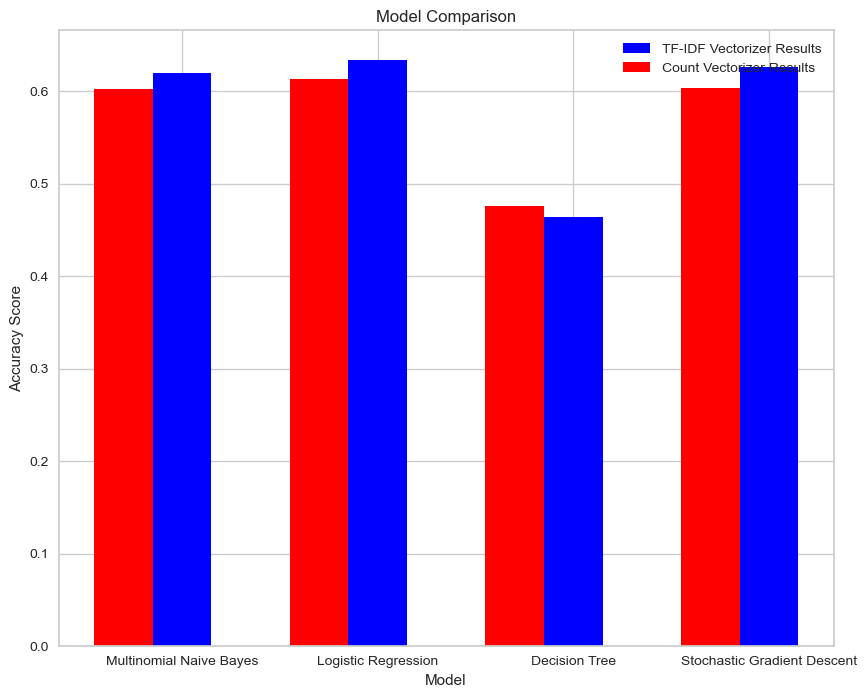

In [47]:
# Create DataFrames for model results with TF-IDF and CountVectorizer
tfidf_model_results = pd.DataFrame(model_resultstfidf.items(), columns=['model', 'accuracy_score'])
count_vec_results = pd.DataFrame(model_results_cvec.items(), columns=['model', 'accuracy_score'])

# Extract accuracy scores from both results for plotting
y1 = tfidf_model_results['accuracy_score']
y2 = count_vec_results['accuracy_score']

# Initialize the plot
fig, ax = plt.subplots(figsize = (10,8))

# Define the index positions for the bars
ind = np.arange(len(tfidf_model_results))

# Set the width of the bars
width = 0.3

# Plot the accuracy scores for TF-IDF models
plt.bar(ind, y1, width, color = 'blue')

# Plot the accuracy scores for CountVectorizer models
plt.bar(ind - width, y2, width,color = 'red')

# Set the title and axis labels
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')

# Customize the x-axis tick labels for models
plt.xticks(np.arange(4), ['Multinomial Naive Bayes', 'Logistic Regression', 'Decision Tree', 'Stochastic Gradient Descent'])
plt.legend(['TF-IDF Vectorizer Results', 'Count Vectorizer Results'])

# Save the plot as an image
fig.savefig('./Images/modelcomparisonplot.png')

In [37]:
# Merge TF-IDF and CountVectorizer model results in the model column
model_scores = pd.merge(tfidf_model_results, count_vec_results, how = 'left', on = 'model')

# Rename columns for clarity in the final dataframe
model_scores = model_scores.rename(columns = {'accuracy_score_x':'tfidf_score', 'accuracy_score_y':'count_vec_score'})

# Export the model scores as an image
dfi.export(model_scores, './Images/model_scores.png')

In [38]:
# Returns the combination of parameters that provides best performance during cross validation
logreg_tfidf_gs.best_params_

{'C': 1.0,
 'class_weight': 'balanced',
 'multi_class': 'ovr',
 'penalty': 'l2',
 'solver': 'liblinear'}

### Test Set Predictions with Logistic Regression Model Pipeline

In [39]:
# Create a pipeline with TF-IDF Vectorizer and Logistic Regression classifier
logreg_pipeline = Pipeline([('vect', TfidfVectorizer(ngram_range = (1,1), max_df=.85, min_df=15)),
                            ('clf', LogisticRegression(C = 1.0, class_weight = 'balanced', multi_class = 'ovr', penalty = 'l2', solver = 'liblinear', random_state = 42))])

# Fit the model with the training data
logreg_pipeline.fit(X_train, y_train)

# Get predicted probabilities for test data
y_hat_prob=logreg_pipeline.predict_proba(X_test)

# Get the predicted class labels for the test data
y_hat = logreg_pipeline.predict(X_test)

# Print the test accuracy score
print('Test Accuracy score:', accuracy_score(y_test, y_hat))

# Print the classification report for test data
print(classification_report(y_test, y_hat))

Test Accuracy score: 0.6369655172413793
              precision    recall  f1-score   support

           1       0.69      0.69      0.69      1491
           2       0.70      0.64      0.67      1095
           3       0.70      0.78      0.74       292
           4       0.50      0.60      0.55       275
           5       0.38      0.31      0.34       241
           6       0.40      0.46      0.43       231

    accuracy                           0.64      3625
   macro avg       0.56      0.58      0.57      3625
weighted avg       0.64      0.64      0.64      3625



### Confusion Matrix of Logistic Regression for Test Set

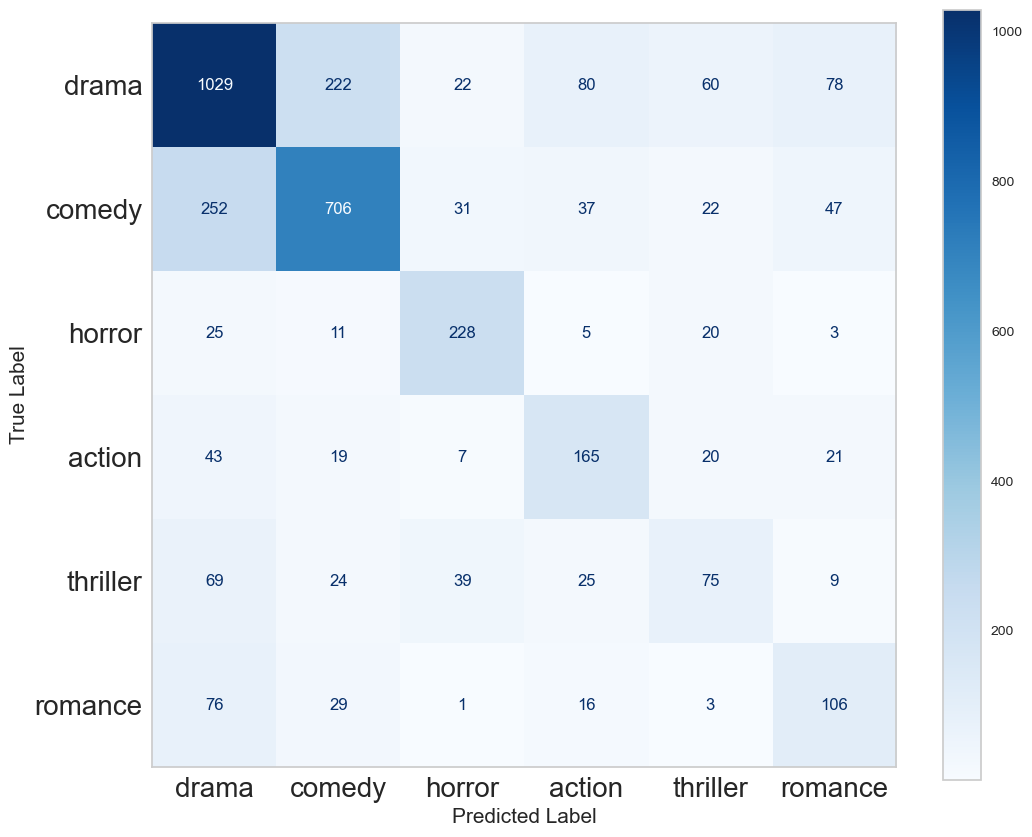

In [40]:
# Plot confusion matrix for the Logistic Regression model on the test data
fig, ax = plt.subplots(figsize=(12,10))

# Generate the confusion matrix display
ConfusionMatrixDisplay.from_estimator(logreg_pipeline, X_test, y_test, 
                                      display_labels=['drama', 'comedy', 'horror', 'action', 'thriller', 'romance'],
                                      ax=ax, cmap='Blues')
# Customize the plot appearance
plt.grid(None)
plt.xlabel('Predicted Label', size = 15)
plt.ylabel('True Label', size = 15)
plt.xticks(size = 20)
plt.yticks(size = 20)

# Save the confusion matrix plot as an image 
fig.savefig('./Images/confusionmatrix.png')

### Test Set Classification Using the SGD Model Pipeline

In [41]:
# Train and evaluate an SGD classifier pipeline with TF-IDF vectorization on movie plot data
sgd_pipeline = Pipeline([
    ('vect', TfidfVectorizer(ngram_range=(1, 1), max_df=0.85, min_df=15)),
    ('clf', SGDClassifier(alpha=0.0001, loss='log_loss', max_iter=20, 
                          penalty='l2', class_weight='balanced', random_state=42))
])

# Fit the model on training data
sgd_pipeline.fit(X_train, y_train)

# Make predictions on the test data and evaluate
y_hat_sgd = sgd_pipeline.predict(X_test)
print('Test Accuracy score:', accuracy_score(y_test, y_hat_sgd))
print(classification_report(y_test, y_hat_sgd))

Test Accuracy score: 0.6361379310344828
              precision    recall  f1-score   support

           1       0.69      0.68      0.69      1491
           2       0.70      0.65      0.67      1095
           3       0.69      0.79      0.74       292
           4       0.50      0.60      0.54       275
           5       0.36      0.31      0.34       241
           6       0.40      0.46      0.43       231

    accuracy                           0.64      3625
   macro avg       0.56      0.58      0.57      3625
weighted avg       0.64      0.64      0.64      3625



### Confusion Matrix of SDG Classifier for Test Set

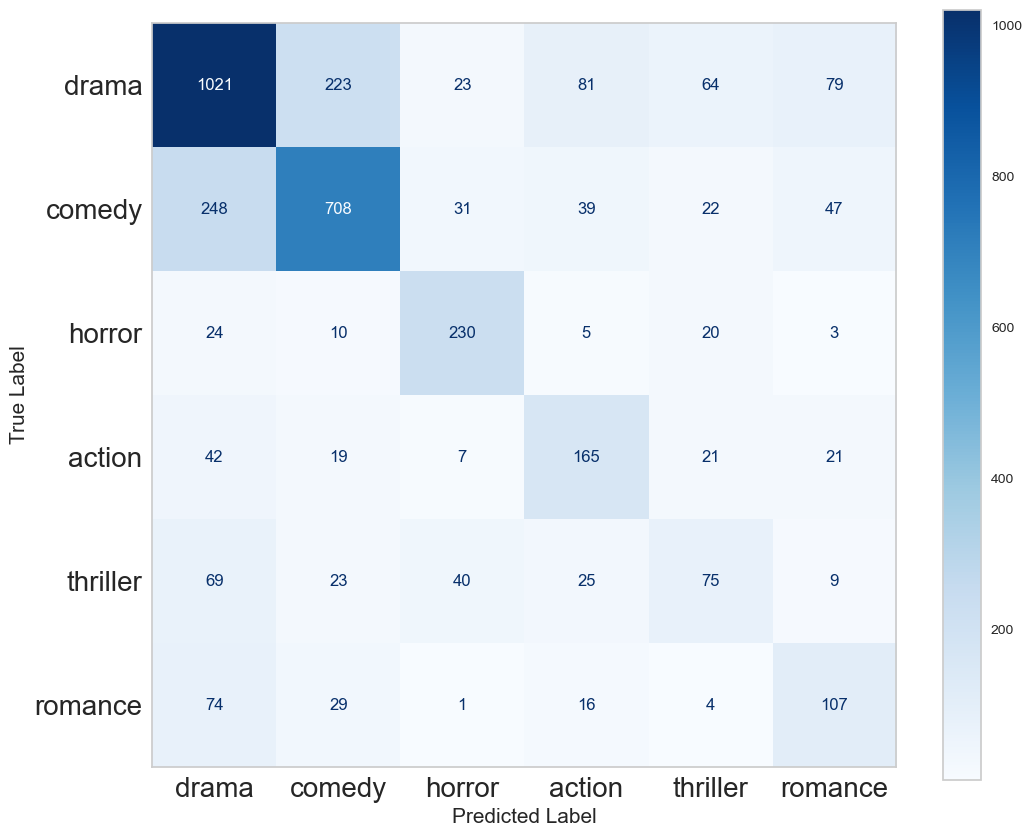

In [42]:
# Plot and save the confusion matrix for the SGD classifier model's predictions on the test set
fig, ax = plt.subplots(figsize=(12,10))
ConfusionMatrixDisplay.from_estimator(sgd_pipeline, X_test, y_test, 
                                      display_labels=['drama', 'comedy', 'horror', 'action', 'thriller', 'romance'],
                                      ax=ax, cmap='Blues')

# Customize the plot appearance
plt.grid(None)
plt.xlabel('Predicted Label', size = 15)
plt.ylabel('True Label', size = 15)
plt.xticks(size = 20)
plt.yticks(size = 20)

# Save the confusion matrix plot as an image
fig.savefig('./Images/confusionmatrixsgd.png')

In [43]:
# Create a DataFrame containing genre types and their corresponding unique plot words
genre_plotlist = [['drama', ' '.join(list(set(drama_plotlist)))], ['comedy', ' '.join(list(set(comedy_plotlist)))], 
                  ['horror', ' '.join(list(set(horror_plotlist)))], ['action', ' '.join(list(set(action_plotlist)))],
                 ['thriller', ' '.join(list(set(thriller_plotlist)))], ['romance', ' '.join(list(set(romance_plotlist)))]]
genre_plot_df = pd.DataFrame(genre_plotlist, columns = ['genre_type', 'plot_words'])
genre_plot_df

genre_type                                         plot_words
0      drama  magdalena heidelberg neeley continue rotary ne...
1     comedy  heidelberg oriole magdalena continue rotary su...
2     horror  continue maulle agosta emotionless noted hit r...
3     action  continue rotary subbaiah emotionless noted hit...
4   thriller  neeley continue noted hit raise honored anger ...
5    romance  koteswara muffled continue sober deeper rio sr...

In [44]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity between plot word vectors of different genres
count_vec = CountVectorizer()
count_matrix = count_vec.fit_transform(genre_plot_df['plot_words'])
cosine_sim = pd.DataFrame(cosine_similarity(count_matrix))
cosine_sim

0         1         2         3         4         5
0  1.000000  0.592180  0.526214  0.510078  0.530736  0.478405
1  0.592180  1.000000  0.543498  0.518686  0.542131  0.476919
2  0.526214  0.543498  1.000000  0.538035  0.578921  0.492369
3  0.510078  0.518686  0.538035  1.000000  0.568492  0.529389
4  0.530736  0.542131  0.578921  0.568492  1.000000  0.536878
5  0.478405  0.476919  0.492369  0.529389  0.536878  1.000000